In [6]:
import tensorflow as tf
import os

2023-06-12 09:25:28.215423: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [54]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [55]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Images

In [24]:
import cv2
import imghdr

In [162]:
data_dir = '/Users/arushigupta/Desktop/Intership/Tires/Data' 


In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

## Loading Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [166]:
data = tf.keras.utils.image_dataset_from_directory('data') 

Found 94 files belonging to 2 classes.


In [167]:
data_iterator = data.as_numpy_iterator()

2023-06-07 11:57:41.001292: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [94]
	 [[{{node Placeholder/_4}}]]
2023-06-07 11:57:41.001819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [94]
	 [[{{node Placeholder/_4}}]]


In [168]:
batch = data_iterator.next()

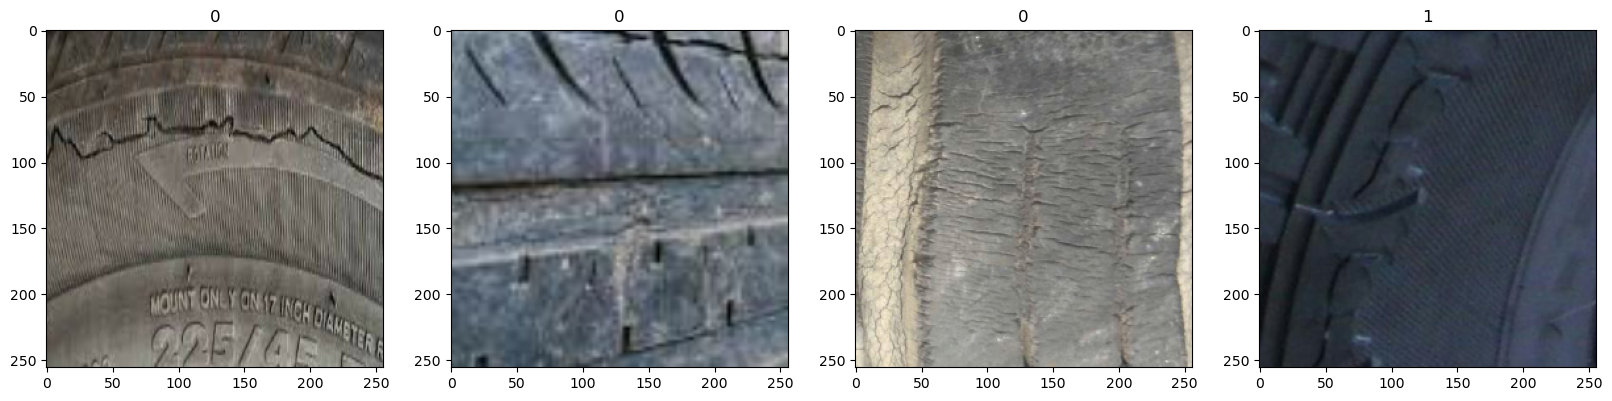

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
#batch 0: Cracked Tire
#batch 1: Normal Tire

## Scaling Data

In [170]:
data = data.map(lambda x,y: (x/255, y))

In [171]:
data.as_numpy_iterator().next()

2023-06-07 11:57:56.890168: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [94]
	 [[{{node Placeholder/_4}}]]
2023-06-07 11:57:56.890739: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [94]
	 [[{{node Placeholder/_0}}]]


(array([[[[0.9991881 , 0.9991881 , 0.9991881 ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.67343044, 0.6499684 , 0.62680054],
          [0.69608337, 0.7090871 , 0.6750037 ],
          [0.72966033, 0.7261775 , 0.7141781 ]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [0.66770214, 0.77350813, 0.7186245 ],
          [0.6336532 , 0.5770963 , 0.545266  ],
          [0.687728  , 0.65672857, 0.62793267]],
 
         [[0.98297286, 0.98297286, 0.98297286],
          [0.92530924, 0.92530924, 0.92530924],
          [0.99986213, 0.99986213, 0.99986213],
          ...,
          [0.7840842 , 0.9041874 , 0.8920705 ],
          [0.6502295 , 0.77420616, 0.72433794],
          [0.70758474, 0.6565737 , 0.6246497 ]],
 
         ...,
 
         [[0.15686275, 0.18431373, 0.22352941],
          [0.15686

## Split Data

In [172]:
len(data)

3

In [173]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [174]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Building Model

In [175]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense

In [26]:
model = Sequential()

In [178]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [179]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [180]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

## Train

In [181]:
logdir='logs'

In [182]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [183]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-06-07 11:58:24.971380: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [94]
	 [[{{node Placeholder/_4}}]]
2023-06-07 11:58:24.971705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [94]
	 [[{{node Placeholder/_4}}]]
2023-06-07 11:58:25.441884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 1.3121 - accuracy: 0.5000

2023-06-07 11:58:28.668951: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [94]
	 [[{{node Placeholder/_4}}]]
2023-06-07 11:58:28.669269: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [94]
	 [[{{node Placeholder/_4}}]]
2023-06-07 11:58:28.735697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 5s 1s/step - loss: 1.3121 - accuracy: 0.5000 - val_loss: 0.6362 - val_accuracy: 0.6000
Epoch 2/20
2/2 [==============================] - 1s 519ms/step - loss: 0.7255 - accuracy: 0.4531 - val_loss: 0.6850 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 1s 375ms/step - loss: 0.6799 - accuracy: 0.5781 - val_loss: 0.6764 - val_accuracy: 0.5333
Epoch 4/20
2/2 [==============================] - 1s 366ms/step - loss: 0.6757 - accuracy: 0.4688 - val_loss: 0.6615 - val_accuracy: 0.4667
Epoch 5/20
2/2 [==============================] - 1s 359ms/step - loss: 0.6088 - accuracy: 0.5781 - val_loss: 0.8130 - val_accuracy: 0.4000
Epoch 6/20
2/2 [==============================] - 1s 380ms/step - loss: 0.6804 - accuracy: 0.4688 - val_loss: 0.5955 - val_accuracy: 0.7000
Epoch 7/20
2/2 [==============================] - 1s 386ms/step - loss: 0.5891 - accuracy: 0.6406 - val_loss: 0.5700 - val_accuracy: 0.5667
Epoch 8/20
2/2 [==================

## Plot

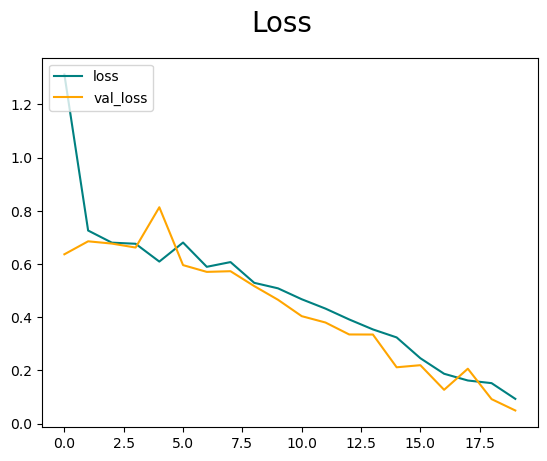

In [184]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

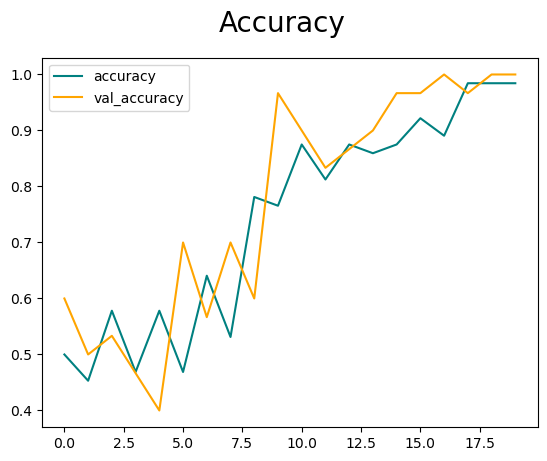

In [185]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evalute

In [20]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [187]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [188]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2023-06-07 11:59:01.483199: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [94]
	 [[{{node Placeholder/_0}}]]
2023-06-07 11:59:01.484105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [94]
	 [[{{node Placeholder/_4}}]]


In [189]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


## Test

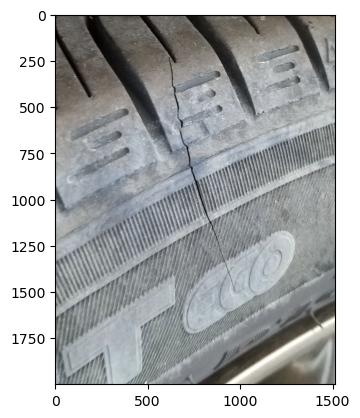

In [28]:
img = cv2.imread('/Users/arushigupta/Desktop/Intership/Tires/Data/cracked/pic.jpeg')
plt.imshow(img)
plt.show()

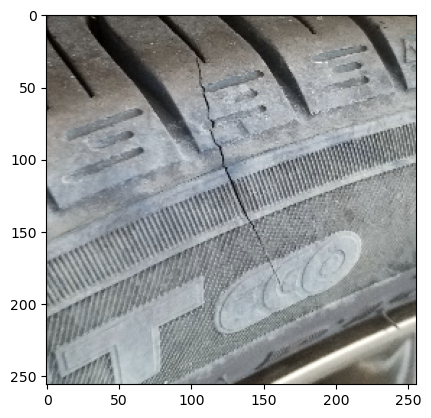

In [29]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [30]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 181ms/step


2023-06-12 13:32:14.215403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [32]:
if yhat > 0.5: 
    print(f'The image is of a Normal Tire')
else:
    print(f'The image is of a Cracked Tire')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Save

In [198]:
from tensorflow.keras.models import load_model

In [199]:
model.save('TireHealth.h5')